<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2021-ban7002/blob/main/Week_4_Restaurants_in_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYC Restaurant Inspections


---

Today's data comes from [New York City Restaurant Inspection Results](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/rs6k-p7g6) This dataset provides restaurant inspections, violations, grades and adjudication information.

## What are we going to do?

1. import the data
2. convert strings to dates
3. clean up column names
4. ask some questions of the data
  - how many resturants by boro?
  - what is the relationship between grade and score?
  - how many violations contain the word smoking
  - help former govenor cuomo and his brother find a pizza resturant.
  


In [ ]:
# typical packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# mapping package
import folium

In [ ]:
# CSV File's URL
nyc_url = 'https://raw.githubusercontent.com/MonkeyWrenchGang/PythonBootcamp/main/day_5/data/2020_New_York_City_Restaurant_Inspections.csv'

# Read CSV data into a pandas DataFrame
nyc = pd.read_csv(nyc_url)
nyc.head()

<ipython-input-2-64ef0cab7e3a>:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc = pd.read_csv(nyc_url)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50053139,BASIL BRICK OVEN,Queens,2817,ASTORIA BLVD,11102.0,7182041205,Italian,01/02/2020,Violations were cited in the following area(s).,...,07/06/2020,Cycle Inspection / Initial Inspection,40.770645,-73.920227,401.0,22.0,6900.0,4017403.0,4.008390e+09,QN71
1,50087123,POPEYES,Bronx,4399,WHITE PLAINS ROAD,10466.0,7186531100,Chicken,01/02/2020,Violations were cited in the following area(s).,...,07/06/2020,Cycle Inspection / Initial Inspection,40.898268,-73.854449,212.0,11.0,41800.0,2069778.0,2.050420e+09,BX62
2,41296533,PABLO'S RESTAURANT,Brooklyn,43,NEWKIRK PLAZA,11226.0,7184217603,American,01/02/2020,Violations were cited in the following area(s).,...,07/06/2020,Cycle Inspection / Re-inspection,40.634729,-73.962739,314.0,40.0,52000.0,3121197.0,3.052360e+09,BK42
3,50092023,GO GO CURRY,Manhattan,12,JOHN STREET,10038.0,2124065555,Japanese,01/02/2020,Violations were cited in the following area(s).,...,07/06/2020,Cycle Inspection / Initial Inspection,40.709997,-74.009100,101.0,1.0,1502.0,1001103.0,1.000650e+09,MN25
4,50014229,AINSWORTH MIDTOWN,Manhattan,45,EAST 33 STREET,10016.0,2122011228,American,01/02/2020,Violations were cited in the following area(s).,...,07/06/2020,Cycle Inspection / Initial Inspection,40.746888,-73.982944,105.0,2.0,7400.0,1080794.0,1.008638e+09,MN17


In [ ]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32998 entries, 0 to 32997
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  32998 non-null  int64  
 1   DBA                    32998 non-null  object 
 2   BORO                   32998 non-null  object 
 3   BUILDING               32917 non-null  object 
 4   STREET                 32988 non-null  object 
 5   ZIPCODE                32573 non-null  float64
 6   PHONE                  32997 non-null  object 
 7   CUISINE DESCRIPTION    32998 non-null  object 
 8   INSPECTION DATE        32998 non-null  object 
 9   ACTION                 32998 non-null  object 
 10  VIOLATION CODE         32839 non-null  object 
 11  VIOLATION DESCRIPTION  32618 non-null  object 
 12  CRITICAL FLAG          32618 non-null  object 
 13  SCORE                  31795 non-null  float64
 14  GRADE                  17723 non-null  object 
 15  GR

## Convert inspection date

In [ ]:
nyc['INSPECTION DATE'] = pd.to_datetime(nyc['INSPECTION DATE'] )
nyc.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50053139,BASIL BRICK OVEN,Queens,2817,ASTORIA BLVD,11102.0,7182041205,Italian,2020-01-02,Violations were cited in the following area(s).,...,07/06/2020,Cycle Inspection / Initial Inspection,40.770645,-73.920227,401.0,22.0,6900.0,4017403.0,4.008390e+09,QN71
1,50087123,POPEYES,Bronx,4399,WHITE PLAINS ROAD,10466.0,7186531100,Chicken,2020-01-02,Violations were cited in the following area(s).,...,07/06/2020,Cycle Inspection / Initial Inspection,40.898268,-73.854449,212.0,11.0,41800.0,2069778.0,2.050420e+09,BX62
2,41296533,PABLO'S RESTAURANT,Brooklyn,43,NEWKIRK PLAZA,11226.0,7184217603,American,2020-01-02,Violations were cited in the following area(s).,...,07/06/2020,Cycle Inspection / Re-inspection,40.634729,-73.962739,314.0,40.0,52000.0,3121197.0,3.052360e+09,BK42
3,50092023,GO GO CURRY,Manhattan,12,JOHN STREET,10038.0,2124065555,Japanese,2020-01-02,Violations were cited in the following area(s).,...,07/06/2020,Cycle Inspection / Initial Inspection,40.709997,-74.009100,101.0,1.0,1502.0,1001103.0,1.000650e+09,MN25
4,50014229,AINSWORTH MIDTOWN,Manhattan,45,EAST 33 STREET,10016.0,2122011228,American,2020-01-02,Violations were cited in the following area(s).,...,07/06/2020,Cycle Inspection / Initial Inspection,40.746888,-73.982944,105.0,2.0,7400.0,1080794.0,1.008638e+09,MN17


In [ ]:
nyc['CUISINE DESCRIPTION'].value_counts()

,count
CUISINE DESCRIPTION,
American,6305
Chinese,3801
Café/Coffee/Tea,1642
Mexican,1566
Pizza,1451
...,...
Iranian,5
Fruits/Vegetables,4
Czech,4


In [ ]:
nyc.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

## Clean up Column Names


---



In [ ]:
nyc.columns = nyc.columns.str.lower()
nyc.columns = nyc.columns.str.replace(' ','_')
nyc.columns

Index(['camis', 'dba', 'boro', 'building', 'street', 'zipcode', 'phone',
       'cuisine_description', 'inspection_date', 'action', 'violation_code',
       'violation_description', 'critical_flag', 'score', 'grade',
       'grade_date', 'record_date', 'inspection_type', 'latitude', 'longitude',
       'community_board', 'council_district', 'census_tract', 'bin', 'bbl',
       'nta'],
      dtype='object')

# Asking Questions

1. how many boros are their in NYC?


In [ ]:
nyc['boro'].value_counts()

,count
boro,
Manhattan,13254
Brooklyn,8210
Queens,7802
Bronx,2672
Staten Island,1048
0,12


2. make a histogram of `score`

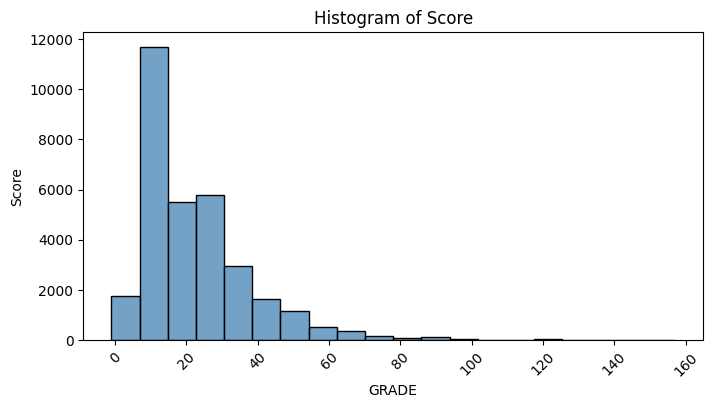

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=nyc,
            x='score',
             #hue="grade",
             bins=20,
             color='steelblue')
plt.title('Histogram of Score')
plt.xlabel('GRADE')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Make a Boxplot of Scores

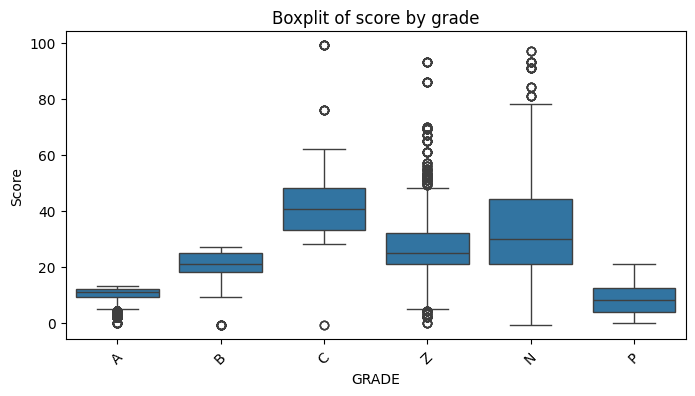

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=nyc,
            x='grade',
            y='score')
plt.title('Boxplit of score by grade')
plt.xlabel('GRADE')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

3. what is the relationship between score and grade? make a barchart of the mean score by grade. make a 2nd barchart of the count by grade.

Restaurants with a score between 0 and 13 points earn an A, those with 14 to 27 points receive a B and those with 28
or more a C.

In [ ]:
nyc.groupby('grade')[['score']].mean()

,score
grade,
A,10.132344
B,20.766082
C,43.132716
N,33.393145
P,8.722222
Z,28.098327


In [ ]:
res1 = nyc.groupby('grade')[['score']].mean().reset_index()
res1

,grade,score
0,A,10.132344
1,B,20.766082
2,C,43.132716
3,N,33.393145
4,P,8.722222
5,Z,28.098327


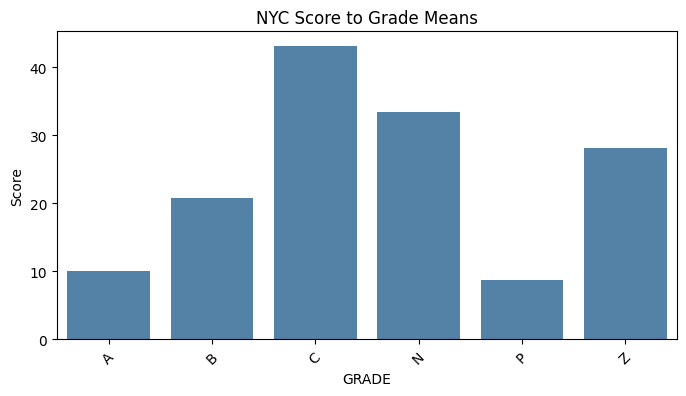

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=res1,
            x='grade',
            y='score',
             color='steelblue')
plt.title('NYC Score to Grade Means')
plt.xlabel('GRADE')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
res1 = nyc.groupby('grade').agg({'score':['mean','count']}).reset_index()
res1

grade      score       
              mean  count
0     A  10.132344  12067
1     B  20.766082    855
2     C  43.132716    324
3     N  33.393145   1984
4     P   8.722222     36
5     Z  28.098327   2451

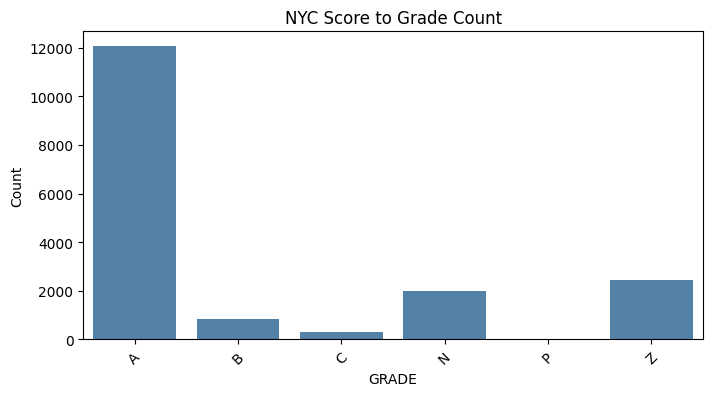

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=res1,
            x='grade',
            y=('score','count'),
             color='steelblue')
plt.title('NYC Score to Grade Count')
plt.xlabel('GRADE')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

4. how many violation descriptions contain the word "smoking", select dba, 'boro', inspection_date, violation_description

In [ ]:
filter_mask = (nyc["violation_description"].str.contains('smoking')) & \
              (nyc["violation_description"].notna())

nyc[filter_mask][["dba", 'boro',"inspection_date", "violation_description"]]

,dba,boro,inspection_date,violation_description
730,LADYBIRD,Manhattan,2020-01-03,Food worker does not wash hands thoroughly aft...
4000,CAFE - BAR LAIKA,Brooklyn,2020-01-10,Food worker does not wash hands thoroughly aft...
4137,JIN JIN HONG KONG CAFE,Brooklyn,2020-01-13,Food worker does not wash hands thoroughly aft...
4190,KUNG FU TEA,Queens,2020-01-13,Food worker does not wash hands thoroughly aft...
5062,JAPAN VILLAGE,Brooklyn,2020-01-14,Food worker does not wash hands thoroughly aft...
7540,KINGS PASTRAMI,Brooklyn,2020-01-18,Food worker does not wash hands thoroughly aft...
8425,NEW CHINA III,Queens,2020-01-22,Food worker does not wash hands thoroughly aft...
9464,NOWADAYS,Queens,2020-01-23,Food worker does not wash hands thoroughly aft...
11196,ZAO MEN QIAN,Queens,2020-01-28,Food worker does not wash hands thoroughly aft...
12243,BLACK SEED BAGELS,Manhattan,2020-01-30,Food worker does not wash hands thoroughly aft...


## Govenor Cuomo & his Brother

The former Governor would like to take his brother out for a nice slice of pizza, where are all the pizza restaurants in NYC with a grade of A?

In [ ]:
# Filter rows with specific conditions
nyc_insp = nyc.query("cuisine_description == 'Pizza' \
                      and latitude.notna() and grade.notna()\
                      and grade == 'A'")[
    ["dba", "boro", "latitude", "longitude","score","grade"]]
nyc_insp

,dba,boro,latitude,longitude,score,grade
9,PRIMA PIZZA,Bronx,40.890903,-73.849495,11.0,A
44,99 CENT EXPRESS PIZZA,Manhattan,40.758087,-73.989720,11.0,A
82,MAMA'S PIZZA CAFE,Manhattan,40.758752,-73.988695,13.0,A
126,ITALIA PIZZA,Brooklyn,40.605048,-73.978968,12.0,A
144,PRIMA PIZZA,Bronx,40.890903,-73.849495,11.0,A
...,...,...,...,...,...,...
32859,LAYLA JONES,Brooklyn,40.686652,-73.993845,13.0,A
32882,LAYLA JONES,Brooklyn,40.686652,-73.993845,13.0,A
32929,LAYLA JONES,Brooklyn,40.686652,-73.993845,13.0,A
32961,BROOKLYN PIZZA CREW,Brooklyn,40.672761,-73.950240,7.0,A


## Wow there is a lot of Duplicates

let's deal with them!

The `.drop_duplicates()` function in pandas is used to remove duplicate values from a DataFrame or Series. It helps in identifying and eliminating duplicate records based on specified columns or the entire dataset.

Here's a brief introduction to the `.drop_duplicates()` function:

Syntax:
```python
DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)
```

Parameters:

- `subset` (optional): Specifies the column(s) to consider for identifying duplicates. By default, it is set to None, which considers all columns.
- `keep` (optional): Determines which duplicate values to keep. It can take the following values:
  - first: Keep the first occurrence of each set of duplicates.
  - last: Keep the last occurrence of each set of duplicates.
  - False: Remove all occurrences of duplicates.
- `inplace` (optional): Specifies whether to modify the DataFrame in-place or return a new DataFrame with duplicates removed. By default, it is set to False, which returns a new DataFrame.



In [ ]:
# Filter rows with specific conditions
nyc_insp = nyc.query("cuisine_description == 'Pizza' \
                      and latitude.notna() and grade.notna()\
                      and grade == 'A'")[
    ["dba", "boro", "latitude", "longitude","score","grade"]].drop_duplicates().reset_index()
nyc_insp

,index,dba,boro,latitude,longitude,score,grade
0,9,PRIMA PIZZA,Bronx,40.890903,-73.849495,11.0,A
1,44,99 CENT EXPRESS PIZZA,Manhattan,40.758087,-73.989720,11.0,A
2,82,MAMA'S PIZZA CAFE,Manhattan,40.758752,-73.988695,13.0,A
3,126,ITALIA PIZZA,Brooklyn,40.605048,-73.978968,12.0,A
4,822,2 BROS PIZZA,Manhattan,40.804765,-73.938340,4.0,A
...,...,...,...,...,...,...,...
235,32584,DOMINO'S,Queens,40.765350,-73.817030,7.0,A
236,32689,BROOKLYN PIZZA CREW,Brooklyn,40.672761,-73.950240,7.0,A
237,32707,LITTLE CAESARS,Brooklyn,40.662633,-73.920320,4.0,A
238,32769,CALIFORNIA PIZZA KITCHEN,Queens,40.709259,-73.870056,12.0,A


## Let's Map Them!

In [ ]:
# Create a map centered on a specific location in this case NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add markers to the map based on the latitude and longitude coordinates
for _, row in nyc_insp.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['dba']
    ).add_to(m)

# Display the map
m

## The Gov and his Bro
want to ensure that they avoid B,C grade pizza restuarnts change your query above to filter for B & C then we'll color the results on the map!

In [ ]:
# Filter rows with specific conditions
nyc_insp2 = nyc.query("cuisine_description == 'Pizza' \
                      and latitude.notna() and grade.notna()\
                      and grade == ['B','C']")[
    ["dba", "boro", "latitude", "longitude","score","grade"]].drop_duplicates().reset_index()
nyc_insp2

,index,dba,boro,latitude,longitude,score,grade
0,645,J-II PIZZERIA,Brooklyn,40.617980,-73.960180,17.0,B
1,2357,MARTINIELLO'S PIZZERIA,Queens,40.710910,-73.905178,14.0,B
2,2361,GOLD GRILL PIZZERIA,Staten Island,40.628936,-74.116757,26.0,B
3,3275,LITTLE CAESARS,Bronx,40.824043,-73.873538,17.0,B
4,6476,SAL'S PIZZA,Bronx,40.875165,-73.879493,19.0,B
5,7687,CITY PIZZA,Manhattan,40.759877,-73.991586,59.0,C
6,7780,99 CENTS TASTY PIZZA PLACE,Manhattan,40.757912,-73.991442,26.0,B
7,8134,LUCY'S PIZZA & RESTAURANT,Brooklyn,40.604229,-73.971701,49.0,C
8,9012,NOEL'S PIZZA 2,Bronx,40.862688,-73.902889,28.0,C
9,11572,BAKER'S PIZZA,Manhattan,40.729371,-73.981123,24.0,B


In [ ]:
import folium

# Create a map centered on a specific location (in this case, NYC)
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Define color mapping for grades
color_mapping = {
    'A': 'green',
    'B': 'orange',
    'C': 'red'
}

# Add markers to the map based on the latitude and longitude coordinates
for _, row in nyc_insp2.iterrows():
    grade = row['grade']
    color = color_mapping.get(grade, 'gray')  # Set default color to gray if grade is not in the mapping
    biz_popup = f"{row['dba']} - score: {row['score']}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],

        popup=biz_popup,
        icon=folium.Icon(color=color)
    ).add_to(m)

# Display the map
m
